# Подготовка (pandas, numpy, etc)

## numpy

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_pred = np.array([0.9, 0.2, 0.1, 0.4, 0.9])
y_ans = np.array([1, 0, 0, 1, 1])

### 1. $L_1$ норма
Напишите функцию, которая для двух векторов вычисляет их $L_1$ норму ("манхэттенское расстояние" или "расстояние городских кварталов"):
$$\begin{align*} & L_1(y_{pred}, y) = \sum_{i=0}^m|y^{(i)} - y_{pred}^{(i)}| \end{align*}$$  

In [0]:
def L1_norm(y_pred, y_ans):    
    return (np.sum(abs(y-y_pred)))

assert round(L1_norm(y_pred, y_ans), 1)== 3047.9, 'Не верно реализован расчёт'

In [0]:
print("L1 = " + str(L1_norm(y_pred,y_ans))) #L1 = 1.1

L1 = 3047.9


### 2. $L_2$ норма
Напишите функцию, которая для двух векторов вычисляет их $L_2$ норму (евклидово расстояние):
$$\begin{align*} & L_2(y_{pred},y) = \sum_{i=0}^m(y^{(i)} - y_{pred}^{(i)})^2 \end{align*}$$

In [0]:
def L2_norm(y_pred, y_ans):
    return (np.sum((y-y_pred) ** 2 ))


assert round(L2_norm(y_pred, y_ans), 3)== 10082.086, 'Не верно реализован расчёт'

In [0]:
print("L2 = " + str(L2_norm(y_pred,y_ans))) #L2 = 0.43

L2 = 10082.086


### 3. Неуникальные строки
Напишите функцию, которая для 2-мерной матрицы произвольного размера возвращает все строки, содержащие только одинаковые значения (напр. [2, 2, 2, 2])

In [0]:
np.random.seed(777)
Z = np.random.randint(0,5,(6,5))
Z_eq = np.array((np.ones(5), np.zeros(5)))
Z = np.vstack((Z, Z_eq))
print(Z)

[[3. 1. 4. 1. 2.]
 [0. 2. 0. 3. 1.]
 [2. 4. 1. 3. 2.]
 [2. 2. 4. 0. 2.]
 [2. 4. 0. 0. 0.]
 [3. 2. 2. 0. 3.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]


In [0]:
def non_unique(X):
    return (np.array([row for row in X if len(np.unique(row)) == 1 ]))

In [0]:
print("Equal items rows: \n", non_unique(Z))


#  Ответ: 
#  [[1. 1. 1. 1. 1.]
#  [0. 0. 0. 0. 0.]]

Equal items rows: 
 [[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]


## pandas

__Прочитайте "telecom_churn.csv" в датафрейм__

In [0]:
df = pd.read_csv('telecom_churn.csv')

__Выведите первые 10 строк__

In [0]:
df.head(10)

__Выведите число объектов и колонок в датафрейме__

In [0]:
df.shape

__Выведите названия всех колонок__

In [0]:
df.columns

__Покажите все возможные значения поля UniqueSubs и их количества__

In [0]:
df['UniqueSubs'].value_counts()

__Сгруппируйте данные по полю MaritalStatus и посчитайте среднее для InboundCalls и OutboundCalls (ответ должен быть в виде таблицы)__

In [0]:
df.groupby(['MaritalStatus'])['InboundCalls' , 'OutboundCalls'].agg([np.mean])

# Сама лаба

__Считайте данные и выведете первые 5 строк датасета (tips.csv)__

In [0]:
df = pd.read_csv("tips.csv")



In [0]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


__Покажите на графике зависимость размера чаевых от времени и разделите это по полам__

Использовать _catplot_

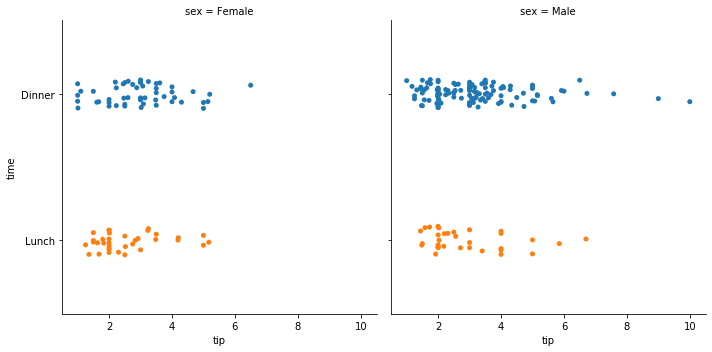

In [0]:
sns.catplot(x='tip',
            y='time',
            col='sex',
            data=df)

__Покажите на графике зависимость размера чаевых от полного счета и разделите это по полам__

Использовать _lineplot_

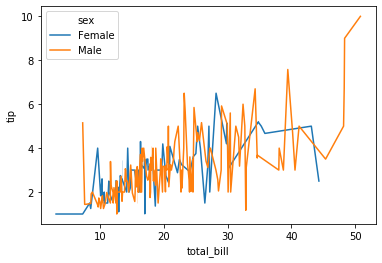

In [0]:
sns.lineplot(x="total_bill",
            y="tip",
            hue="sex",
            data=df)

In [0]:
#Просто выполните
X_1 = df.drop(['tip', 'sex', 'smoker', 'day', 'time'], axis=1)
X_2 = df.drop(['total_bill', 'size', 'tip'], axis=1)
y = np.array(df.drop(['sex', 'total_bill', 'smoker', 'day', 'time', 'size'], axis=1).values)
X_2_clear = pd.get_dummies(X_2)
X = np.array(pd.concat([X_1,X_2_clear], axis=1).values)
print(X)

[[16.99  2.    1.   ...  0.    1.    0.  ]
 [10.34  3.    0.   ...  0.    1.    0.  ]
 [21.01  3.    0.   ...  0.    1.    0.  ]
 ...
 [22.67  2.    0.   ...  0.    1.    0.  ]
 [17.82  2.    0.   ...  0.    1.    0.  ]
 [18.78  2.    1.   ...  1.    1.    0.  ]]


In [0]:
#Просто выполните
features = pd.concat([X_1,X_2_clear], axis=1)
target = df.drop(['sex', 'total_bill', 'smoker', 'day', 'time', 'size'], axis=1)
train_data, test_data, train_target, test_target = train_test_split(features, target, test_size = 0.3, random_state=0)

<font size=3 >__Немного теории__</font>

Мы разберем __основные метрики качества и функционалы потерь__ задачи регрессии. Далее все будем называть __метриками__.

__Метрики необходимы для:__
- поиска оптимального решения
- оценки качества работы модели
- сравнения моделей
- интерпретации результатов



<table border="1" width="100%">
 <tr>
    <td width="50%"> 
        <p> <font size=3> $MAE= \frac{1}{n} \sum_{i=1}^n |y_i-\hat{y_i}|$  </font> </p> 
        <p> 
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                легко интерпретировать 
            </font><br/>
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                единицы измерения таргета и метрики – эквивалентны
            </font><br/>
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                устойчива к выбросам 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                не ограничена сверху 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                не дифференцируема в таком виде 
            </font>
        </p><br/>
        <p> <font size=3> $MSE= \frac{1}{n} \sum_{i=1}^n (y_i-\hat{y_i})^2$  </font> </p> 
        <p> 
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                дифференцируема
            </font><br/>
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                чувствительна к выбросам
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                не ограничена сверху 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                сложно интерпретировать 
            </font><br/>
        </p><br/>
        <p> <font size=3> $RMSE=\sqrt{\frac{1}{n} \sum_{i=1}^n (y_i-\hat{y_i})^2} $  </font> </p> 
        <p> 
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                дифференцируема
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                не ограничена сверху 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                еще сложнее интерпретировать 
            </font>
        <p>Основное различие $RMSE$ и $MAE$ заключается в том, что минимизация $RMSE$ сремиться к средней оценке, а  $MAE$ к медиане</p><br/><p>$y$ $-$ истинное значение; $\hat{y}$ $-$ предсказанное значение</p>
        </p><br/>
     </td>
    <td><img src="./errors_2.png" align="right"></td>
 </tr>
</table>

Две попытки __объединить__ положительные __свойства метрик__:
- [Функция потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss): 
    * ведет себя как $MSE$ на ошибках меньше $\sigma$ и как $MAE$ в противном случае. __Что не дает "взрываться" метрике на больших значениях и "жестко" реагирует на маленькие остатки__
    * все так же не удобно дифференцировать
- [Log-Cosh Loss](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0):
    * принимает меньшие значения по сравнению с функцией потерь Хьюбера на всем множестве
    * __дважды дифференцируема__, что необходимо в некоторых методах численной оптимизации.
________________________
__Проблема:__ все предыдущие метрики __не подходят для оценки конкретного решения__ а только для сравнения моделей, что следует из того что __функции не ограничены сверху.__ 

Эта проблема так же решается посредством доработок $MAE$: [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) и [SMAPE](https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error). Однако, подробно рассмотрим метрику $R^2$
и мотивы появления $R^2_{adj}$.

$$R^2=1-\frac{\sum_{i=1}^n (y_i-\hat{y_i})^2}{\sum_{i=1}^n (y_i-\bar{y_i})^2}$$

Данная метрика обладает следующими свойствами:

<font size=2> 
    <span style="color:green; margin-left:2em">$ +$ </span>
     ограничена сверху и снизу, что позволяет дать оценку конкретному решению без сравнения с другими
</font><br/>
<font size=2> 
    <span style="color:green; margin-left:2em">$ +$ </span>
     хорошо интерпретируется: на сколько наша модель лучше, чем константное решение
</font><br/>
<font size=2> 
    <span style="color:red; margin-left:2em">$ -$ </span>
     не диффиренцируема
</font><br/>
<font size=2> 
    <span style="color:red; margin-left:2em">$ -$ </span>
     значение метрики растет (не уменьшается) при добавлении новых переменных, даже если они никак не объясняют целевой показатель. Поэтому нельзя сравнивать модели с разным количеством признаков. Данная проблема решается с помощью $R^2_{adj}$
</font>

$$R^2_{adj}=1-(1-R^2)\frac{n-1}{n-p-1}$$

где $p -$ число признаков, а $n -$ количество объектов

__Рекомендации:__ использовать $R^2_{adj}$ для сравнения моделей и оценки количества переменных, а $R^2$ для оценки качества на новых объектах


__В данном задании вам необходимо реализовать 4 основные метрики:__ $MAE; MSE; RMSE; R^2$

Каждая из метрик принимает на вход 2 одномерных numpy массива:
- __y_true__ - истинные значения 
- __y_predict__ - предсказанные значения

Каждая из функций должна возврашать одно число 



In [0]:
def MAError(y_true, y_predict):
    error = np.sum(np.abs(y_true - y_predict)) / len(y_true)
    return error


def MSError(y_true, y_predict):
    error = np.sum(np.power((y_true - y_predict), 2)) / len(y_true)
    return error


def RMSError(y_true, y_predict):
    error = np.sqrt(np.sum(np.power((y_true - y_predict), 2)) / len(y_true))
    return error


def R_square(y_true, y_predict):
    error = 1 - (np.sum(np.power((y_true - y_predict), 2)) / np.sum(np.power((y_true - np.mean(y_true)), 2)))
    return error


def all_metric(y_true, y_predict):
    d = {}
    d['MAE'] = [MAError(y_true, y_predict)] 
    d['MSE'] = [MSError(y_true, y_predict)] 
    d['RMSE'] = [RMSError(y_true, y_predict)]
    d['R_square'] = [R_square(y_true, y_predict)]
    return d


# assert round(MAError(y_true=Y_train, y_predict=Y_train_predict), 3) == 1.274, 'Не верно реализован расчёт'
# assert time_delta(MAError, Y_train, Y_train_predict) < 1.5, 'Функция работает слишком долго, возможно вы используете лишние циклы'

# assert round(MSError(y_true=Y_train, y_predict=Y_train_predict), 3) == 2.22, 'Не верно реализован расчёт'
# assert time_delta(MSError, Y_train, Y_train_predict) < 1.5, 'Функция работает слишком долго, возможно вы используете лишние циклы'

# assert round(RMSError(y_true=Y_train, y_predict=Y_train_predict), 3)== 1.49, 'Не верно реализован расчёт'
# assert time_delta(RMSError, Y_train, Y_train_predict) < 1.5, 'Функция работает слишком долго, возможно вы используете лишние циклы'

# assert round(R_square(y_true=Y_train, y_predict=Y_train_predict), 3)== 0.843, 'Не верно реализован расчёт'
# assert time_delta(R_square, Y_train, Y_train_predict) < 1.5, 'Функция работает слишком долго, возможно вы используете лишние циклы'

Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$


Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

__Реализуйте функции__
1. __normal_equation__, которая по заданным матрицам (массивам NumPy) X* и *y вычисляет вектор весов  𝑤  согласно нормальному уравнению линейной регрессии.

2. __linear_prediction__, которая принимает на вход матрицу X* и вектор весов линейной модели *w, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы X* с весами *w.

In [0]:
def normal_equation(X, y):
    w = np.linalg.inv(X.T@X) @ X.T @ y
    return w


def linear_prediction(X, w):
    ans = np.dot(X, w)
    return ans


norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[-5.56016978e-02]
 [ 7.66761065e-01]
 [-1.13186851e+15]
 [-1.13186851e+15]
 [ 2.08502094e+15]
 [ 2.08502094e+15]
 [-9.53152428e+14]
 [-9.53152428e+14]
 [-9.53152428e+14]
 [-9.53152428e+14]
 [-1.31037500e+01]
 [-1.00092187e+01]]


In [0]:
tip_pred = MSError(y, linear_prediction(X, norm_eq_weights))
print(tip_pred)

assert round(MSError(y, linear_prediction(X, norm_eq_weights)), 3)== 61.562, 'Не верно реализован расчёт'

61.5622666991187


In [0]:
# Просто выполнить
LinReg = LinearRegression()
LinReg.fit(train_data, train_target)
ans1 = LinReg.predict(test_data)

In [0]:
# Просто выполнить
mean_squared_error(test_target, ans1)

0.9550808988617153